In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Assignment03").getOrCreate()

23/03/27 19:08:09 WARN Utils: Your hostname, Adityas-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 130.85.234.174 instead (on interface en0)
23/03/27 19:08:09 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/27 19:08:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
spark

In [58]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, TimestampType

crime_schema = StructType([
    StructField('ID', IntegerType(), True),
    StructField('Case_Number', StringType(), True),
    StructField('Date', StringType(), True),
    StructField('Block', StringType(), True),
    StructField('IUCR', StringType(), True),
    StructField('Primary_Type', StringType(), True),
    StructField('Description', StringType(), True),
    StructField('Location_Description', StringType(), True),
    StructField('Arrest', StringType(), True),
    StructField('Domestic', StringType(), True),
    StructField('Beat', StringType(), True),
    StructField('District', StringType(), True),
    StructField('Ward', StringType(), True),
    StructField('Community_Area', StringType(), True),
    StructField('FBI_Code', StringType(), True),
    StructField('X_Coordinate', StringType(), True),
    StructField('Y_Coordinate', StringType(), True),
    StructField('Year', IntegerType(), True),
    StructField('Updated_On', StringType(), True),
    StructField('Latitude', DoubleType(), True),
    StructField('Longitude', DoubleType(), True),
    StructField('Location', StringType(), True)
])


In [59]:
crime_data = spark.read.csv('/Users/adityakiran/Desktop/DATA 603/Assignment 03/Crimes_-_2001_to_Present.csv', header=True, schema=crime_schema)

In [60]:
crime_data.count() #returns the number of records

7752207

In [61]:
crime_data = crime_data.na.drop() # dropping the rows with null values 

In [62]:
crime_data.count() # checking if the records are removed

23/03/27 19:39:49 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, Case_Number, Date, Block, IUCR, Primary_Type, Description, Location_Description, Arrest, Domestic, Beat, District, Ward, Community_Area, FBI_Code, X_Coordinate, Y_Coordinate, Year, Updated_On, Latitude, Longitude, Location
Expected: Case_Number but found: Case Number
CSV file: file:///Users/adityakiran/Desktop/DATA%20603/Assignment%2003/Crimes_-_2001_to_Present.csv


7053558

In [63]:
crime_data.select("Date").show() # working on the date column

23/03/27 19:39:56 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, Case_Number, Date, Block, IUCR, Primary_Type, Description, Location_Description, Arrest, Domestic, Beat, District, Ward, Community_Area, FBI_Code, X_Coordinate, Y_Coordinate, Year, Updated_On, Latitude, Longitude, Location
Expected: Case_Number but found: Case Number
CSV file: file:///Users/adityakiran/Desktop/DATA%20603/Assignment%2003/Crimes_-_2001_to_Present.csv
+--------------------+
|                Date|
+--------------------+
|09/05/2015 01:30:...|
|09/04/2015 11:30:...|
|09/05/2015 12:45:...|
|09/05/2015 01:00:...|
|09/05/2015 10:55:...|
|09/04/2015 06:00:...|
|09/05/2015 01:00:...|
|09/05/2015 11:30:...|
|09/05/2015 02:00:...|
|09/05/2015 11:00:...|


In [64]:
# Changing the data type of teh column 'date' to timestamp

from pyspark.sql.functions import to_timestamp

crime_data = crime_data.withColumn('Date', to_timestamp(crime_data['Date'], 'MM/dd/yyyy hh:mm:ss a')) 

In [65]:
crime_data.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case_Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary_Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location_Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community_Area: string (nullable = true)
 |-- FBI_Code: string (nullable = true)
 |-- X_Coordinate: string (nullable = true)
 |-- Y_Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated_On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [66]:
# Filtering the data only for the last 10 years

from pyspark.sql.functions import year, current_date
crime_data = crime_data.filter(year('Date') >= (year(current_date()) - 10))

In [67]:
crime_data.count()

23/03/27 19:40:03 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, Case_Number, Date, Block, IUCR, Primary_Type, Description, Location_Description, Arrest, Domestic, Beat, District, Ward, Community_Area, FBI_Code, X_Coordinate, Y_Coordinate, Year, Updated_On, Latitude, Longitude, Location
Expected: Case_Number but found: Case Number
CSV file: file:///Users/adityakiran/Desktop/DATA%20603/Assignment%2003/Crimes_-_2001_to_Present.csv


2573166

In [68]:
# Removing the records with the crime types listed

from pyspark.sql.functions import col

# list of crime types to remove
crime_types_to_remove = ['NON-CRIMINAL (SUBJECT SPECIFIED)', 'OTHER OFFENSE', 'STALKING', 'NON - CRIMINAL', 'ARSON']

# filtering the crime_data DataFrame to remove the specified crime types
crime_data = crime_data.filter(~col('Primary_Type').isin(crime_types_to_remove))


In [69]:
crime_data.count()

23/03/27 19:40:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, Case_Number, Date, Block, IUCR, Primary_Type, Description, Location_Description, Arrest, Domestic, Beat, District, Ward, Community_Area, FBI_Code, X_Coordinate, Y_Coordinate, Year, Updated_On, Latitude, Longitude, Location
Expected: Case_Number but found: Case Number
CSV file: file:///Users/adityakiran/Desktop/DATA%20603/Assignment%2003/Crimes_-_2001_to_Present.csv


2403368

In [70]:
from pyspark.sql.functions import when

crime_data = crime_data.withColumn('Primary_Type', when((crime_data['Primary_Type'] == 'SEX OFFENSE') | (crime_data['Primary_Type'] == 'PROSTITUTION'), 'SEX OFFENSE/PROSTITUTION')
                        .when((crime_data['Primary_Type'] == 'THEFT') | (crime_data['Primary_Type'] == 'BURGLARY') | (crime_data['Primary_Type'] == 'ROBBERY'), 'THEFT/ROBBERY/BURGLARY')
                        .when((crime_data['Primary_Type'] == 'ASSAULT') | (crime_data['Primary_Type'] == 'BATTERY'), 'ASSAULT/BATTERY')
                        .when((crime_data['Primary_Type'] == 'MOTOR VEHICLE THEFT') | (crime_data['Primary_Type'] == 'ARSON'), 'MOTOR VEHICLE THEFT/ARSON')
                        .when((crime_data['Primary_Type'] == 'CRIMINAL DAMAGE') | (crime_data['Primary_Type'] == 'CRIMINAL TRESPASS'), 'CRIMINAL DAMAGE/TRESPASS')
                        .otherwise(crime_data['Primary_Type']))


In [72]:
from pyspark.sql.functions import year, count

# grouping the data by Year
yearly_crime_counts = crime_data.groupBy(year('Date').alias('Year')).agg(count('*').alias('Crime_Count'))

# filtering the data to include only the last ten years
current_year = 2023
yearly_crime_counts_last_ten_years = yearly_crime_counts.filter(yearly_crime_counts['Year'] >= current_year - 10)

yearly_crime_counts_last_ten_years.show()

23/03/27 19:40:41 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, Case_Number, Date, Block, IUCR, Primary_Type, Description, Location_Description, Arrest, Domestic, Beat, District, Ward, Community_Area, FBI_Code, X_Coordinate, Y_Coordinate, Year, Updated_On, Latitude, Longitude, Location
Expected: Case_Number but found: Case Number
CSV file: file:///Users/adityakiran/Desktop/DATA%20603/Assignment%2003/Crimes_-_2001_to_Present.csv


+----+-----------+
|Year|Crime_Count|
+----+-----------+
|2018|     245309|
|2015|     239886|
|2022|     217534|
|2013|     287835|
|2014|     256126|
|2019|     240839|
|2020|     194262|
|2016|     248587|
|2017|     246560|
|2021|     187731|
|2023|      38699|
+----+-----------+



23/03/27 19:40:49 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, Case_Number, Date, Block, IUCR, Primary_Type, Description, Location_Description, Arrest, Domestic, Beat, District, Ward, Community_Area, FBI_Code, X_Coordinate, Y_Coordinate, Year, Updated_On, Latitude, Longitude, Location
Expected: Case_Number but found: Case Number
CSV file: file:///Users/adityakiran/Desktop/DATA%20603/Assignment%2003/Crimes_-_2001_to_Present.csv


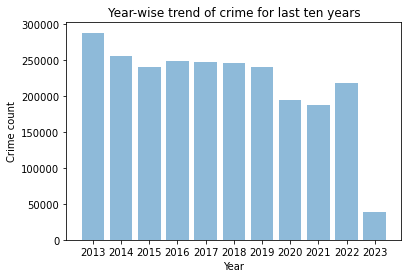

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# convert the Spark DataFrame to a Pandas DataFrame
yearly_crime_counts_pd = yearly_crime_counts_last_ten_years.toPandas()

# creating a bar graph
plt.bar(yearly_crime_counts_pd['Year'], yearly_crime_counts_pd['Crime_Count'], align='center', alpha=0.5)
plt.xticks(yearly_crime_counts_pd['Year'])
plt.title('Year-wise trend of crime for last ten years')
plt.xlabel('Year')
plt.ylabel('Crime count')
plt.show()

In [76]:
from pyspark.sql.functions import hour

# grouping the data by the hour
hourly_crime_counts = crime_data.groupBy(hour('Date').alias('Hour')) \
    .agg({'ID': 'count'}) \
    .orderBy('Hour')

hourly_crime_counts.show(24)

23/03/27 19:41:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, Case_Number, Date, Block, IUCR, Primary_Type, Description, Location_Description, Arrest, Domestic, Beat, District, Ward, Community_Area, FBI_Code, X_Coordinate, Y_Coordinate, Year, Updated_On, Latitude, Longitude, Location
Expected: Case_Number but found: Case Number
CSV file: file:///Users/adityakiran/Desktop/DATA%20603/Assignment%2003/Crimes_-_2001_to_Present.csv


+----+---------+
|Hour|count(ID)|
+----+---------+
|   0|   128206|
|   1|    75110|
|   2|    65242|
|   3|    54214|
|   4|    42501|
|   5|    36661|
|   6|    41859|
|   7|    57088|
|   8|    80785|
|   9|   105017|
|  10|   104545|
|  11|   108413|
|  12|   139480|
|  13|   114748|
|  14|   120658|
|  15|   131870|
|  16|   127567|
|  17|   129378|
|  18|   135415|
|  19|   135207|
|  20|   129403|
|  21|   120976|
|  22|   119000|
|  23|   100025|
+----+---------+



23/03/27 19:41:26 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, Case_Number, Date, Block, IUCR, Primary_Type, Description, Location_Description, Arrest, Domestic, Beat, District, Ward, Community_Area, FBI_Code, X_Coordinate, Y_Coordinate, Year, Updated_On, Latitude, Longitude, Location
Expected: Case_Number but found: Case Number
CSV file: file:///Users/adityakiran/Desktop/DATA%20603/Assignment%2003/Crimes_-_2001_to_Present.csv


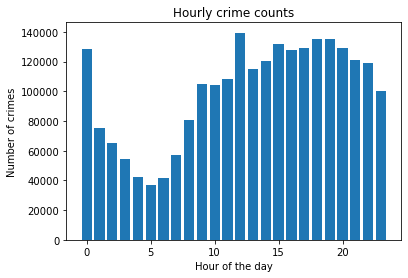

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

hourly_crime_counts_pd = hourly_crime_counts.toPandas()

# creating a bar graph
plt.bar(hourly_crime_counts_pd['Hour'], hourly_crime_counts_pd['count(ID)'])
plt.title('Hourly crime counts')
plt.xlabel('Hour of the day')
plt.ylabel('Number of crimes')
plt.show()

23/03/27 19:41:37 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, Case_Number, Date, Block, IUCR, Primary_Type, Description, Location_Description, Arrest, Domestic, Beat, District, Ward, Community_Area, FBI_Code, X_Coordinate, Y_Coordinate, Year, Updated_On, Latitude, Longitude, Location
Expected: Case_Number but found: Case Number
CSV file: file:///Users/adityakiran/Desktop/DATA%20603/Assignment%2003/Crimes_-_2001_to_Present.csv


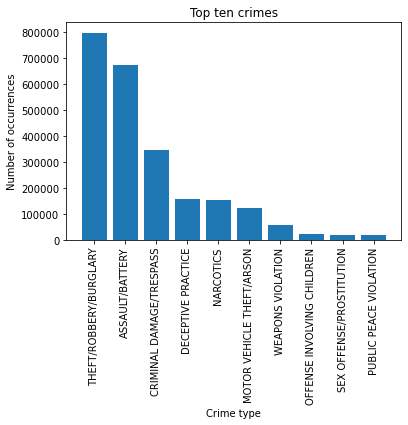

In [78]:
from pyspark.sql.functions import desc

# grouping the data by Primary_Type
crime_counts = crime_data.groupBy('Primary_Type').count()

# selecting the top 10
top_crimes = crime_counts.sort(desc('count')).limit(10)

top_crimes_pd = top_crimes.toPandas()

# creating a bar graph
plt.bar(top_crimes_pd['Primary_Type'], top_crimes_pd['count'])
plt.title('Top ten crimes')
plt.xlabel('Crime type')
plt.ylabel('Number of occurrences')
plt.xticks(rotation=90)
plt.show()